In [10]:
import os
import json
import pandas as pd
import collections
import matplotlib.pyplot as plt
pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [11]:
f = open(f"./resumes.json", encoding="utf8")
jsonText = f.read()
f.close()
resumes = json.loads(jsonText)

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

flatten_resumes = []

for key in resumes.keys():
    resume = flatten(resumes[key])
    resume['id'] = key
    flatten_resumes.append(resume)


fileName = f"./flatten_resumes.json"
f = open(fileName, mode='w', encoding='utf8')
f.write(json.dumps(flatten_resumes, ensure_ascii=False))
f.close()
print(f"Количество резюме: {len(resumes.keys())}")

Количество резюме: 4544


In [12]:
df = pd.DataFrame(flatten_resumes)
df.describe(percentiles=[
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.85,
    0.9,
    0.95,
    0.96,
    0.97,
    0.98,
    0.99,
])

,salary_amount
count,2397.000000
mean,97340.595745
std,80597.502605
...,...
98%,350000.000000
99%,400000.000000
max,1000000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   birth_date       4274 non-null   object 
 1   gender           4544 non-null   object 
 2   area             4544 non-null   object 
 3   title            4544 non-null   object 
 4   specialization   4544 non-null   object 
 5   salary_amount    2397 non-null   float64
 6   salary_currency  2397 non-null   object 
 7   education_level  4544 non-null   object 
 8   education        4544 non-null   object 
 9   language         4544 non-null   object 
 10  experience       4544 non-null   object 
 11  skill_set        4544 non-null   object 
 12  skills           4544 non-null   object 
 13  id               4544 non-null   object 
dtypes: float64(1), object(13)
memory usage: 266.3+ KB


<AxesSubplot:title={'center':'salary_amount'}>

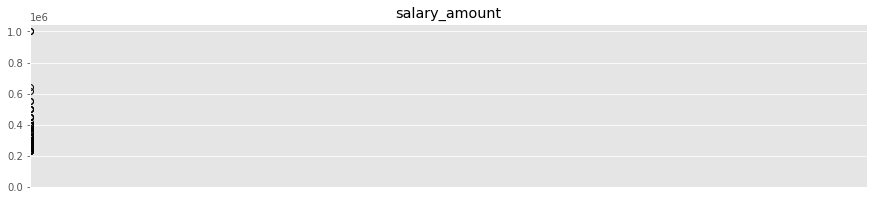

In [13]:
df.info()
df.hist()
df.boxplot()